In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([['ALi',50],['Hassan',55],['Manan',60],['Ahmad',65],['Kazmi',70],['Usama',75],['Hanan',80],['Ashir',85]],
                 columns=['name','marks'])
df

,name,marks
0,ALi,50
1,Hassan,55
2,Manan,60
3,Ahmad,65
4,Kazmi,70
5,Usama,75
6,Hanan,80
7,Ashir,85


1. 2 random samples from all DataFrame

In [9]:
chosen_idx = np.random.choice(7,replace= False, size = 2)
print(chosen_idx)
df_trim = df.iloc[chosen_idx]
df_trim

[1 0]


,name,marks
1,Hassan,55
0,ALi,50


1. 2 random samples from 2nd block

In [12]:
block_start_idx = 4
chosen_idx = np.random.choice(4,replace= False, size = 2)
print(chosen_idx)
df_trim = df.iloc[block_start_idx+chosen_idx]
df_trim

[3 0]


,name,marks
7,Ashir,85
4,Kazmi,70


# Cancer Data Stratification based on "dianosis"

In [2]:
cancer = pd.read_csv(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/KNN.csv')

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
del cancer['id']

In [5]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [30]:
#Sampling
X = cancer.iloc[:,1:]
print(X.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        12.32         12.39           78.85      464.1          0.10280   
1        10.60         18.95           69.28      346.4          0.09688   
2        11.04         16.83           70.92      373.2          0.10770   
3        11.28         13.39           73.00      384.8          0.11640   
4        15.19         13.21           97.65      711.8          0.07963   

   compactness_mean  concavity_mean  points_mean  symmetry_mean  \
0           0.06981         0.03987      0.03700         0.1959   
1           0.11470         0.06387      0.02642         0.1922   
2           0.07804         0.03046      0.02480         0.1714   
3           0.11360         0.04635      0.04796         0.1771   
4           0.06934         0.03393      0.02657         0.1721   

   dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.05955  ...         13.50          15.64            86.97

In [31]:
y = cancer.iloc[:,:1]
print(y.head())

  diagnosis
0         B
1         B
2         B
3         B
4         B


In [6]:
import seaborn as sns

In [8]:
import sklearn

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.1, stratify = y)

In [20]:
y_train.groupby('diagnosis').size() # Stratified Sample 

diagnosis
B    321
M    191
dtype: int64

In [21]:
y_test.groupby('diagnosis').size() # Stratified Sample

diagnosis
B    36
M    21
dtype: int64

In [38]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

print(skf)
StratifiedKFold(n_splits=2, random_state=None, shuffle=True)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index,"Train-size", "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [282 283 285 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392
 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410
 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428
 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464
 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482
 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500
 501 502 503 504 505 506 507 508 509 510 511 512 513 51

KeyError: "None of [Int64Index([282, 283, 285, 288, 289, 290, 291, 292, 293, 294,\n            ...\n            559, 560, 561, 562, 563, 564, 565, 566, 567, 568],\n           dtype='int64', length=284)] are in the [columns]"

# Credit DataSet Stratification based on age and default 

In [67]:
df = pd.read_excel(r'C:/BEPEC Python Material/Machine Learning/Logistic Regression/credit_card.xlsx')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [77]:
"""
column_names = df.loc[0,:]
column_names = column_names.to_list()
#print(type(x))
print(column_names)
print(type(column_names))
l1 = df.columns
l1 = l1.to_list()
print(l1)
print(type(l1))
df.columns = column_names
df.rename(columns= {'PAY_0':'PAY_1'}, inplace=True)
df.drop([0], inplace=True) """
df.drop(columns='ID', inplace=True)
print(df.shape)
df.head(2) 


(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [52]:
print(df.shape[0])
s = df['default payment next month'].value_counts().to_frame()
print((90/100)* 30000)
s['defaulters_stratified'] =(27000/30000)* s['default payment next month']
s

30000
27000.0


,default payment next month,defaulters_stratified
0,23364,21027.6
1,6636,5972.4


In [78]:
X = df.iloc[:,:-1]
print(X.head())
y = df.iloc[:,-1:]
print(y.head())

  LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_1 PAY_2 PAY_3 PAY_4 PAY_5  ...  \
1     20000   2         2        1  24     2     2     0     0     0  ...   
2    120000   2         2        2  26     0     2     0     0     0  ...   
3     90000   2         2        2  34     0     0     0     0     0  ...   
4     50000   2         2        1  37     0     0     0     0     0  ...   
5     50000   1         2        1  57     0     0     0     0     0  ...   

  BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3 PAY_AMT4  \
1       689         0         0         0        0      689        0        0   
2      2682      3272      3455      3261        0     1000     1000     1000   
3     13559     14331     14948     15549     1518     1500     1000     1000   
4     49291     28314     28959     29547     2000     2019     1200     1100   
5     35835     20940     19146     19131     2000    36681    10000     9000   

  PAY_AMT5 PAY_AMT6  
1        0        0  
2     

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.1, stratify = y)

In [103]:
print(y_train['default payment next month'].value_counts())
print(y_test['default payment next month'].value_counts())

0    21028
1     5972
Name: default payment next month, dtype: int64
0    2336
1     664
Name: default payment next month, dtype: int64


21


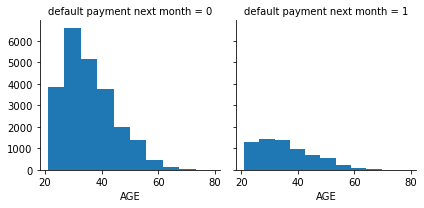

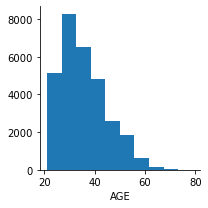

In [104]:
import matplotlib.pyplot as plt
print(df['AGE'].min())
sns.FacetGrid(data=df , col='default payment next month').map(plt.hist, 'AGE')
print(sns.FacetGrid(data=df ).map(plt.hist, 'AGE'))


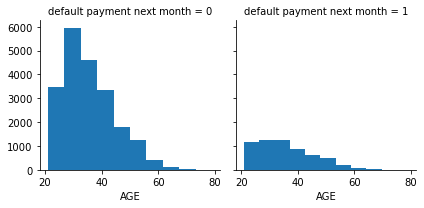

In [105]:
ss = pd.concat([X_train,y_train], axis=1).reset_index()
sns.FacetGrid(data=ss , col='default payment next month' ).map(plt.hist, 'AGE')

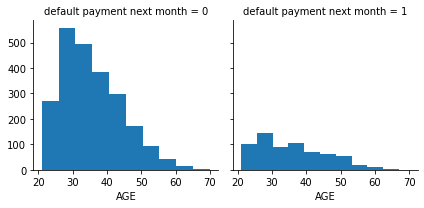

In [106]:
rr = pd.concat([X_test,y_test], axis=1).reset_index()
sns.FacetGrid(data=rr , col='default payment next month' ).map(plt.hist, 'AGE')

In [99]:
rr

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,23122,30000,2,2,1,43,0,0,0,0,...,0,0,5394,4503,9000,0,0,5394,6171,0
1,21399,360000,1,1,1,54,1,0,0,0,...,434,2139,993,3011,7545,502,2205,5,1799,1
2,16692,50000,1,2,2,33,0,0,0,0,...,30227,18413,17195,5494,3202,3502,3200,2500,3000,0
3,11427,20000,1,2,1,53,0,0,0,0,...,23060,23060,-129,0,0,0,0,129,18143,0
4,11280,220000,2,1,2,41,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10716,30000,2,3,1,31,2,2,2,0,...,390,390,390,1906,0,390,390,390,390,1
2996,12529,250000,2,1,1,37,0,0,0,0,...,7019,7062,7242,1267,1310,232,238,279,122,0
2997,8401,100000,2,2,2,32,2,0,0,0,...,58133,60197,59226,3000,3000,4000,3000,0,4300,0
2998,29845,400000,1,1,1,39,0,0,0,0,...,20772,12406,10945,12201,6430,20118,5037,5054,3104,0
